# Table of Contents

1. <a href="#1.-Data-Understanding,-Preparation-&-EDA">Data Understanding, Preparation & EDA</a>
  1. <a href="#1.1.-Data-Quality-Checks">Data Quality Checks</a>
    1. <a href="#1.1.1.-Data-Duplications">Data Duplications</a>
    2. <a href="#1.1.2.-Null/NA-Values">Null/NA Values</a>
    3. <a href="#1.1.3.-Incorrect-Data-Types">Incorrect Data Types</a>
    4. <a href="#1.1.4.-Data-Outliers">Data Outliers</a>
  2. <a href="#1.2.-Dummy-Variables">Dummy Variables</a>
    1. <a href="#1.2.1.-Transform-Nominal-Variable-to-Categorical-Variable">Transform Nominal Variable to Categorical Variable</a>
    2. <a href="#1.2.2.-Transform-Ordinal-Variable-to-Categorical-Variable">Transform Ordinal Variable to Categorical Variable</a>
    3. <a href="#1.2.3.-Transform-Binary-Categorical-Variable-to-One-Hot-Encoding">Transform Binary Categorical Variable to One-Hot Encoding</a>
    4. <a href="#1.2.4.-Transform-Categorical-Variable-to-Dummy-Variable">Transform Categorical Variable to Dummy Variable</a>
  3. <a href="#1.3.-Derived-Metrics">Derived Metrics</a>
    1. <a href="#1.3.1.-Price-per-Square-Foot">Price per Square Foot</a>
    2. <a href="#1.3.2.-House-Age-Since-Built">House Age Since Built</a>
    3. <a href="#1.3.3.-House-Age-Since-Remodel">House Age Since Remodel</a>
  4. <a href="#1.4.-Data-Cleaning">Data Cleaning</a>
    1. <a href="#1.4.1.-Remove-Categorical-Variable">Remove Categorical Variable</a>
2. <a href="#2.-Model-Building-&-Evaluation">Model Building & Evaluation</a>
  1. <a href="#2.1.-Model-Parameters-Tuning">Model Parameters Tuning</a>
    1. <a href="#2.1.1.-Simple-Linear-Regression">Simple Linear Regression</a>
    2. <a href="#2.1.2.-Multiple-Linear-Regression">Multiple Linear Regression</a>
  2. <a href="#2.2.-Feature/Variable-Selection">Feature/Variable Selection</a>
    1. <a href="#2.2.1.-Multiple-Linear-Regression-with-RFE">Multiple Linear Regression with RFE</a>
    2. <a href="#2.2.2.-Regularization-with-Ridge">Regularization with Ridge</a>
    3. <a href="#2.2.3.-Regularization-with-Lasso">Regularization with Lasso</a>
  3. <a href="#2.3.-Model-Evaluation">Model Evaluation</a>
    1. <a href="#2.3.1.-Linearity">Linearity</a>
    2. <a href="#2.3.2.-Normality-of-the-Error-Terms">Normality of the Error Terms</a>
    3. <a href="#2.3.3.-Homescedasticity">Homoscedasticity</a>
  4. <a href="#2.4.-Best-Possible-Model">Best Possible Model</a>
  5. <a href="#2.5.-Model-Interpretation">Model Interpretation</a>
    1. <a href="#2.5.1.-Model-Coeficients">Model Coeficients</a>
    2. <a href="#2.5.2.-Shapley-Additive-Explanations">Shapley Additive Explanations</a>

3. <a href="#3.-Subjective-Model-Experiments">Subjective Model Experiments</a>
  1. <a href="#3.1.-Double-Alpha-Value">Double Alpha Value</a>
    1. <a href="#3.1.1.-Double-Alpha-Value-with-Ridge">Double Alpha Value with Ridge</a>
    2. <a href="#3.1.2.-Double-Alpha-Value-with-Lasso">Double Alpha Value with Lasso</a>
  2. <a href="#3.2.-Five-Most-Important-Variables-Unavailable">Five Most Important Variables Unavailable</a>
    1. <a href="#3.2.1.-Lasso-Model-with-Exclusion">Lasso Model with Exclusion</a>
    2. <a href="#3.2.2.-Lasso-Model-with-Exclusion-Most-Important-Predictors">Lasso Model with Exclusion Most Important Predictors</a>
  3. <a href="#3.3.-Non-Linear-Transformation">Non-Linear Transformation</a>
    1. <a href="#3.3.1.-Transform-Non-Linear-Variables">Transform Non-Linear Variables</a>
    2. <a href="#3.3.2.-Non-Linear-Variables-Lookalike">Non-Linear Variables Lookalike</a>

# 1. Data Understanding, Preparation & EDA

The following statements will import the required libraries:
- `matplotlib.pyplot`, used to display the plot.
- `numpy`, used to run a fast mathematical operation on matrices.
- `pandas`, used to read the csv and perform analysis on it.
- `seaborn`, used to create plots and charts.
- `scipy`, used to calculate statistical values. 
- `shap`, used to interpret model.
- `sklearn`, used to create machine learning model.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import shap

from scipy import stats
from sklearn.feature_selection import RFECV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

/Users/hendrauzia/.pyenv/versions/3.10.3/envs/ljmu-aar/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Lets read our data with the data type inferred automatically by pandas.

In [2]:
df = pd.read_csv('data/train.csv')

## 1.1. Data Quality Checks

Lets take a look at our data, and for convenience of looking at the data visually, lets display all columns for this display, later on we will reset the option to avoid unexpected visual representations.

In [3]:
pd.set_option('display.max_columns', None)

df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


We can see some identifier column, numerical columns, and some categorical columns, visually everything looks fine. Lets follow along with our data quality checks, and we'll figure out actions that needs to be taken care of. Now lets reset the option to avoid unexpected visual representation on future display.

In [4]:
pd.reset_option('max_columns')

### 1.1.1. Data Duplications

#### Remove Identifier Columns

Before we start running the checking on data duplication, we should remove identifier columns, that is because we don't need them to be part of our independent variables due to the nature of the data is unique per observation and is used as an identification and therefore it is of no use.

To visualize the importance of this column, lets see how the value distributed againts our target column with a scatter plot.

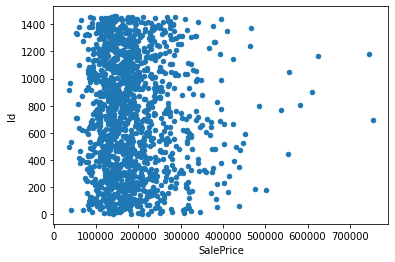

In [5]:
df.plot.scatter(x='SalePrice', y='Id');

Visually there seem to be no correlation on the column, now lets see the correlation value.

In [6]:
df[['Id', 'SalePrice']].corr().loc[['Id']][['SalePrice']]

,SalePrice
Id,-0.021917


The correlation value is very weak, and therefore we can be sure it won't be useful for our model, and we can safely remove the column.

In [7]:
df.drop(columns=['Id'], inplace=True)

#### Duplication Checks

Now lets see if there's any duplication within our dataset.

In [8]:
pd.DataFrame(df.duplicated().value_counts() / len(df) * 100, columns=['percent'])

,percent
False,100.0


As we can see, there are no duplication within our dataset.

### 1.1.2. Null/NA Values

Lets evaluate our data by checking their data type accordingly and how many nulls are there in our data set, in pandas `isnull` is alias for `isna`, therefore running both of them would yield the same result. We would have to create a helper function in order for the function to be able to run multiple times at different places.

In [9]:
def get_null_counts(df):
    # count null and how many percent from the total data are the null values.
    result = pd.DataFrame(df.isnull().sum(), columns=['count'])
    result['percent'] = result['count'] / len(df) * 100

    # order by percent in descending, round to 2 digits, and display only a handful of them.
    result = result.sort_values(by='percent', ascending=False).round(2)
    
    return result

In [10]:
df_null = get_null_counts(df)
df_null.head(20)

,count,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageYrBlt,81,5.55
GarageCond,81,5.55
GarageType,81,5.55
GarageFinish,81,5.55


#### Remove Columns

As we can see, there are columns that has more than 50% of all the data are missing, we can see the columns as follows.

In [11]:
df_null_remove_columns = df_null[df_null.percent > 50]
df_null_remove_columns

,count,percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75


Columns with more than half of the data are missing should be removed alltogether.

In [12]:
df.drop(columns=df_null_remove_columns.index, inplace=True)

Lets see the result of our removal.

In [13]:
df_null = get_null_counts(df)
df_null.head(5)

,count,percent
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


As you can see, columns with high counts of null values have been removed.

#### Remove Rows

We can remove rows with nulls only if they are a small percentage of the total data, e.g. less than 10% as follows.

In [14]:
df_null_remove_rows = df_null[(df_null.percent > 0) & (df_null.percent < 10)]
df_null_remove_rows

,count,percent
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55
GarageQual,81,5.55
GarageCond,81,5.55
BsmtExposure,38,2.60
BsmtFinType2,38,2.60
BsmtQual,37,2.53
BsmtCond,37,2.53
BsmtFinType1,37,2.53


In [15]:
df.dropna(subset=df_null_remove_rows.index, inplace=True)

Lets see the result of our removal.

In [16]:
df_null = get_null_counts(df)
df_null.head(5)

,count,percent
FireplaceQu,591,44.17
LotFrontage,244,18.24
MSSubClass,0,0.00
HalfBath,0,0.00
Fireplaces,0,0.00


As you can see, columns with low counts of null values have been no longer has any missing values.

#### Undecided

We still have some columns with missing values but is in an undecided area, this is because they carry a lot of missing data, but may have significant impact on our model, therefore further analysis need to be done on these columns to decide what to do with these columns.

In [17]:
df_null[(df_null.percent >= 10) & (df_null.percent < 50)]

,count,percent
FireplaceQu,591,44.17
LotFrontage,244,18.24


*FireplaceQu*

This column is a categorical column, but there is some kind of order in the values, therefore we need to transform them into ordinal column. 

In [18]:
df['FireplaceQu'] = df['FireplaceQu'].map({ 'NA': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5 })

Now lets see the distribution of the column against the target column.

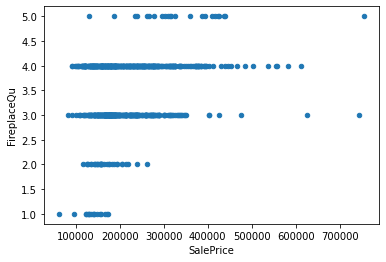

In [19]:
df.plot.scatter(x='SalePrice', y='FireplaceQu');

There seem to be some correlation there, the higher the column value, the wider the target column range value, but lets have our judgement to be more precise by looking into the correlation value of the columns.

In [20]:
df[['FireplaceQu', 'SalePrice']].corr().loc[['FireplaceQu']][['SalePrice']]

,SalePrice
FireplaceQu,0.289515


As we can see, the column has a weak correlation with the target column, therefore we can safely remove the column as the correlation of the column don't add significant value to our model, and neither imputing nor removing the values will bring any benefit to us.

Lets remove this column.

In [21]:
df.drop(columns=['FireplaceQu'], inplace=True)

Now we have only one column left to be reviewed for its null values.

In [22]:
df_null = get_null_counts(df)
df_null.head(3)

,count,percent
LotFrontage,244,18.24
MSSubClass,0,0.00
FullBath,0,0.00


*LotFrontage*

Lets see visually how this column map with the target column with a scatter plot.

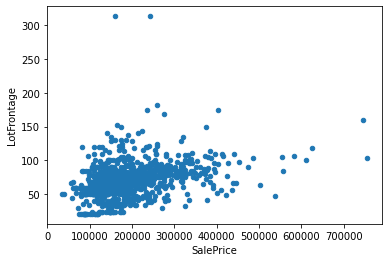

In [23]:
df.plot.scatter(x='SalePrice', y='LotFrontage');

There seem to be a relatively weak correlation, where the higher column value, the less likely it has a low target column value. To have a sound judgement, lets see the correlation value in numeric form.

In [24]:
df[['LotFrontage', 'SalePrice']].corr().loc[['LotFrontage']][['SalePrice']]

,SalePrice
LotFrontage,0.343978


The correlation value is in fact relatively weak, therefore we can safely remove the column, impute the column missing value will definitely hinder the output of our model because almost 20% of the rows have missing value.

Now lets remove the column.

In [25]:
df.drop(columns=['LotFrontage'], inplace=True)

Finally we have no more columns with missing values.

In [26]:
df_null = get_null_counts(df)
df_null.head(3)

,count,percent
MSSubClass,0,0.0
GarageYrBlt,0,0.0
Fireplaces,0,0.0


### 1.1.3. Incorrect Data Types

#### GarageYrBlt

From the data description, it is written as "Year garage was built", but the data was infered as float, this happened because there was missing values in this column, and since they have been removed, now lets fix the column into the proper data type of `int`.

In [27]:
df['GarageYrBlt'] = df['GarageYrBlt'].astype('int')

#### MasVnrArea

From the data description, it is written as "Year garage was built", but the data was infered as float, this happened because there was missing values in this column, and since they have been removed, now lets fix the column into the proper data type of `int`.

In [28]:
df['MasVnrArea'] = df['MasVnrArea'].astype('int')

### 1.1.4. Data Outliers

#### Data Preparation for Outlier Analysis

Let's create a new data frame that holds all of our column with its data type.

In [29]:
df_dtypes = pd.DataFrame(df.dtypes, columns=['dtype'])

In order to analyze data outliers, we only care with the numerical columns, therefore we will filter the column only to numerical data types.

In [30]:
df_dtypes_int = df_dtypes[df_dtypes['dtype'] == 'int64']

We also want to exclude `SalePrice` from our outlier analysis since this is our target column.

In [31]:
df_dtypes_int = df_dtypes_int.drop('SalePrice')

Outliers affect numerical data that has a wide range of values, therefore we will filter only to columns with more than 70 unique values.

In [32]:
df_dtypes_int = df[df_dtypes_int.index].astype('object').describe().loc[['unique']].T
df_dtypes_int = df_dtypes_int[df_dtypes_int['unique'] > 70]

#### Data Outlier Analysis with Scatter Plot

Before we take a look at the visual representation of our data, lets reshape the columns so that they can be fit in a single page.

In [33]:
df_dtypes_int_reshape = np.array(df_dtypes_int.index).reshape(2, -1)

And to have the scatter plot reusable elsewhere, let's create a method that encapsulates our plot.

In [34]:
def scatters(df, columns, target, size):
    rows, cols = columns.shape
    fig, axes = plt.subplots(rows, cols, figsize=size)

    for row in range(0, rows):
        for col in range(0, cols):
            if rows == 1:
                ax = axes[col]
            elif cols == 1:
                ax = axes[row]
            else:
                ax = axes[row, col]
                
            df.plot.scatter(x=columns[row, col], y=target, ax=ax, alpha=0.5)
    
    plt.show()

Now let's plot the relationship between the filtered numerical column against the target column.

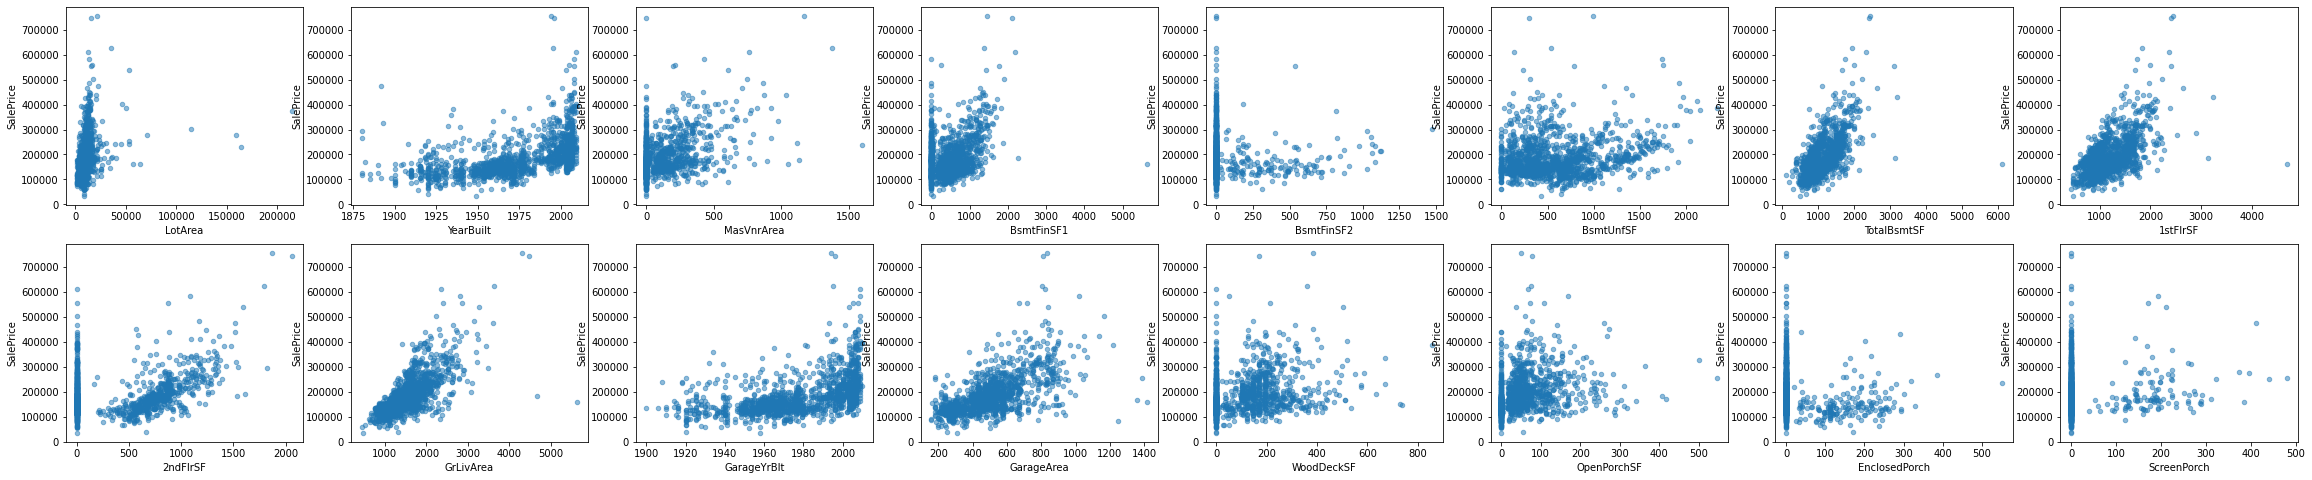

In [35]:
scatters(df, df_dtypes_int_reshape, 'SalePrice', (40, 8))

Scatter plot is not the best way to visualize data outliers, but we can see the total area of our data outliers, and get a feel of how many outliers are there in comparison with the normal data. In the above scatter plot, we can see there are some outliers across several columns.

#### Data Outlier Analysis with Box Plot

Visually we have done outlier analysis with scatter plot to get the total visible area of the outliers, now in order to see the true range of our outliers, we should render box plot on the filtered numerical columns.

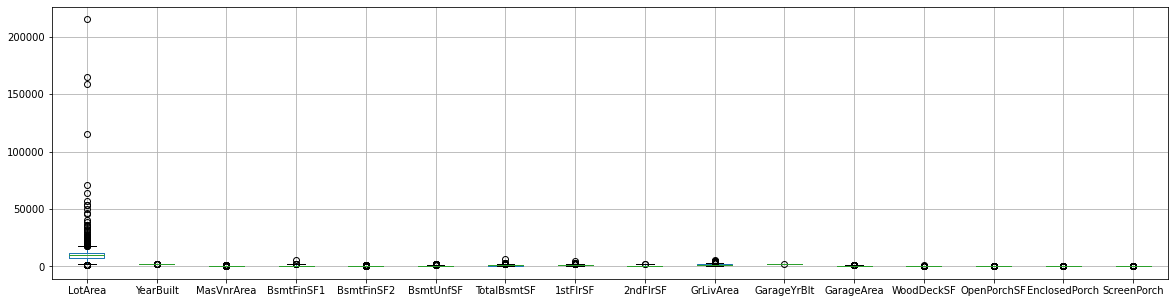

In [36]:
df.boxplot(column=list(df_dtypes_int.index), figsize=(20,5));

It looks like LotArea has some outliers, unfortunately, the scale of LotArea has dwarfed other data and make it seems like other data has no outlier, lets exclude LotArea for now and have a look at the box plot again.

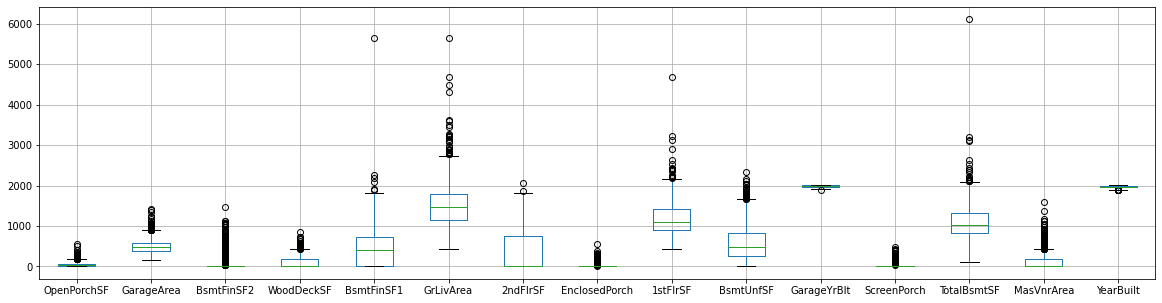

In [37]:
df.boxplot(column=list(set(df_dtypes_int.index) - {'LotArea'}), figsize=(20,5));

All columns have data above the upper fence, we can call them outliers, but only some columns have data way beyond the upper fence, e.g. BsmtFinSF1, GrLivArea, TotalBsmtSF, and 1stFlrSF. We only care with the extreme outliers, therefore we will only deal with the following columns.

In [38]:
df_dtypes_int_outliers = ['LotArea', 'BsmtFinSF1', 'GrLivArea', 'TotalBsmtSF', '1stFlrSF']

#### Remove Data Outliers

Let's create a zscore table with the column that has extreme outliers.

In [39]:
z = np.abs(stats.zscore(df[df_dtypes_int_outliers]))

Now let's see how many outliers are there on each column, we will filter only to values beyond 4 standard deviation, while we can use 3 as detecting outliers, what we care in this case is only extreme outliers, therefore we use the value 4.

In [40]:
z[z < 4].isnull().sum()

LotArea        10
BsmtFinSF1      1
GrLivArea       5
TotalBsmtSF     4
1stFlrSF        4
dtype: int64

Now let's see how many rows will be impacted with our removal.

In [41]:
(z[z < 4].isnull().sum(axis=1) > 0).sum()

17

Finally let's remove our extreme outliers.

In [42]:
df = df[(np.abs(stats.zscore(df[df_dtypes_int_outliers])) < 4).all(axis=1)]

## 1.2. Dummy Variables

### 1.2.1. Transform Nominal Variable to Categorical Variable

Despite the values are numbers, it holds no numerical properties, and the fact that it only used as data classification and is a nominal variable, and therefore we need to transform this column into string to treat them as categorical data, then transform them again to object so that it can be created as dummy variables. On the most recent pandas version, there may be some warning on SettingWithCopyWarning, lets do a deep copy of our data frame to make sure we are not mistakenly assigning our data on a view.

In [43]:
df = df.copy()

##### MSSubClass

In [44]:
df['MSSubClass'] = df['MSSubClass'].astype('string').astype('object')

### 1.2.2. Transform Ordinal Variable to Categorical Variable

Ordinal variables have some of numerical properties, that is the values are in order. Unfortunately, not all numerical properties exists in an ordinal variables, such as interval and ratios, that said, we are missing the information of how far are the gap between each values, and to further amplify the problem, it will be treated by the learning algorithm to the extend of full numerical properties, and this may render the model to be inaccurate.

#### OverallQual

In [45]:
df['OverallQual'] = df['OverallQual'].astype('string').astype('object')

#### OverallCond

In [46]:
df['OverallCond'] = df['OverallCond'].astype('string').astype('object')

### 1.2.3. Transform Binary Categorical Variable to One-Hot Encoding

Categorical variable that has only two values does not need to be created its dummies variable, that is because they are already in a proper form, its just that they are not one-hot encoded. Therefore we can simply transform their values to be one-hot encoded and exclude the column from dummy variable creation.

#### CentralAir

In [47]:
df['CentralAir'] = df['CentralAir'].map({ 'N': 0, 'Y': 1 })

### 1.2.4. Transform Categorical Variable to Dummy Variable

Finally, lets transform all categorical variable to dummy variable so that we can run linear regression on these variables, we also need to drop the first values of each categorical variable to reduce multicolinearity that may arise from the variables, and then join the dummies with the dataframe.

In [48]:
df_dtypes = pd.DataFrame(df.dtypes, columns=['dtype'])
df_dtypes_object = df_dtypes[df_dtypes['dtype'] == 'object']

df_dummies = pd.get_dummies(df[df_dtypes_object.index], drop_first=True)
df = pd.concat([df, df_dummies], axis=1)

## 1.3. Derived Metrics

### 1.3.1. Price per Square Foot

Price per square foot adds weight in the housing industry, it acts as a standard that used as a reference to the general value of a house or land without considering the overall lot and/or building area. Let's create a new derived metric from these two variables called sale price per lot area.

In [49]:
df['SalePricePerLotArea'] = df['SalePrice'] / df['LotArea']

### 1.3.2. House Age Since Built

House age also provides a good benchmark of how old is the house between the sold year since they were first built, it can acts as a reference to the age of the overall structure. Let's create a new derived metric for the house age since built.

In [50]:
df['AgeSinceBuilt'] = df['YrSold'] - df['YearBuilt']

### 1.3.3. House Age Since Remodel

Another important metrics is house age since they were remodeled, some of the house structure or finishes may have been remodeled, and therefore it can act as a proxy to the original age of the house. Let's create a new derived metric for the house age since remodel.

In [51]:
df['AgeSinceRemodel'] = df['YrSold'] - df['YearRemodAdd']

## 1.4. Data Cleaning

### 1.4.1. Remove Categorical Variable

Categorical variables are as of no use in linear regression, therefore we must transform them into dummy variables for them to become usefull, and since they have been transformed into dummy variables, let's remove these categorical variables to clean up our dataset.

In [52]:
df.drop(columns=df_dtypes_object.index, inplace=True)

# 2. Model Building & Evaluation

## 2.1. Model Parameters Tuning

Lets split our data into train and test data, we may need to set the train test ratio to 70:30 because the amount of our dataset is fairly small, and set the random state to 0 so that the result is the same everytime we run the following statement.

In [53]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

### 2.1.1. Simple Linear Regression

First let's find a variable that is mostly correlated with the target variable, that is sale price.

In [54]:
df_train.corr()[['SalePrice']].sort_values(by='SalePrice', ascending=False).head(3)

,SalePrice
SalePrice,1.000000
GrLivArea,0.725528
GarageCars,0.668317


From the above correltion table, the variable that is mostly correlated with the target variable is `GrLivArea`. Now let's build a model using simple linear regression, with the independent variable being `GrLivArea`.

In [55]:
def build_model_with_simple_linear_regression():
    y_train = df_train[['SalePrice']]
    X_train = df_train[['GrLivArea']]

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_test = df_test[['SalePrice']]
    X_test = df_test[['GrLivArea']]

    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))

build_model_with_simple_linear_regression()

R-square of train data:  0.5263906574894687
R-square of tests data:  0.48241896516712257


From the above result, it clearly show our model is way to underfit, and therefore we will not use this model.

### 2.1.2. Multiple Linear Regression

Now on to the extreme direction of using all variables in our dataset by building multiple linear regression, we will also use a min max scaler to aid in explainability of our model, let's find out how the model perform.

In [56]:
def build_model_with_multiple_linear_regression():
    scaler = MinMaxScaler()

    y_train = df_train[['SalePrice']]
    X_train = df_train.drop(columns=['SalePrice'])
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])

    model = LinearRegression()
    model.fit(X_train, y_train)

    y_test = df_test[['SalePrice']]
    X_test = df_test.drop(columns=['SalePrice'])
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))

build_model_with_multiple_linear_regression()

R-square of train data:  0.9587418236616178
R-square of tests data:  -2.7588271526530036e+19


Having a negative correlation on the test data is a setback from the previous step, it means the training was so bad that it performs way worst than just using a horizontal line, therefore we will not use this model.

## 2.2. Feature/Variable Selection

### 2.2.1. Multiple Linear Regression with RFE

One of the method on automatic feature selection can be done by using recursive feature elimination (RFE), it can reduce the total features being used down to the provided parameter, now lets build a method to build model with RFE.

In [57]:
def build_model_with_rfe(scoring):
    scaler = MinMaxScaler()

    y_train = df_train[['SalePrice']]
    X_train = df_train.drop(columns=['SalePrice'])
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
    
    model = RFECV(LinearRegression(), scoring=scoring)
    model.fit(X_train, y_train)

    y_test = df_test[['SalePrice']]
    X_test = df_test.drop(columns=['SalePrice'])
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])

    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))
    
    return model, scaler

Now let's run our RFE with cross validation with R-square as the scoring mechanism.

In [58]:
model, scaler = build_model_with_rfe(scoring='r2');

R-square of train data:  0.35942882465726844
R-square of tests data:  0.32094406209324045


The result is way underfit, the performance is worse than just having a simple linear regression, let's see how many features it can select.

In [59]:
len(model.support_[model.support_ == True])

5

Out of 255 columns, RFE can only select 5 most important features, this is really bad, we need more hyperparameters to adjust our model, this concludes that by doing simply feature elimination, we can't get a descent model for our dataset, therefore, we won't be using RFE.

### 2.2.2. Regularization with Ridge

Out of all features that we have, we should have had some decent variables that yield good result, but using all of them overly complicates our model, and we need to regularize our model to make it less complex and have a better score on the R-square.

In [60]:
def build_model_with_ridge(scoring=None, alpha=None, cv=True):
    params = {'alpha': alpha}
    
    scaler = MinMaxScaler()

    y_train = df_train[['SalePrice']]
    X_train = df_train.drop(columns=['SalePrice'])
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
    
    if cv:
        grid = GridSearchCV(estimator=Ridge(), param_grid=params, scoring=scoring, cv=5, return_train_score=True)   
        grid.fit(X_train, y_train)
        
        param_alpha = grid.best_params_['alpha']
        best_params = grid.best_params_

        print('Best Params:', best_params)
        print()
    else:
        param_alpha = alpha
        best_params = params
    
    model = Ridge(alpha=param_alpha)
    model.fit(X_train, y_train)

    y_test = df_test[['SalePrice']]
    X_test = df_test.drop(columns=['SalePrice'])
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
    
    print('R-square of train data:', model.score(X_train, y_train))
    print('R-square of tests data:', model.score(X_test, y_test))
    
    if cv:
        return model, scaler, best_params
    else:
        return model, scaler, X_train, y_train, X_test, y_test

In [61]:
model_ridge, scaler_ridge, params_ridge = build_model_with_ridge(scoring='neg_mean_absolute_error', alpha=np.arange(2, 3, 0.1));

Best Params: {'alpha': 2.2}

R-square of train data: 0.9475163965229382
R-square of tests data: 0.9081402689819881


In comparison with the all features linear regression without regularization, this is much better with 90% data in the test can be explained, while previously we get negative on the R-square. But having to use all features may not be a good idea as business won't be able to understand which feature is more impactful than the others, giving 254 features with their weights to the client is not practical.

### 2.2.3. Regularization with Lasso

#### Model Building

One way of regularizing our model is by using Lasso, while all features' weight are moved towards zero, the least significant ones are set to zero, therefore we get automatic feature removal just like RFE, but with the addition of regularization.

In [62]:
def build_model_with_lasso(scoring=None, alpha=None, cv=True, exclude=[]):
    params = {'alpha': alpha, 'max_iter': [7_500]}

    scaler = MinMaxScaler()

    y_train = df_train[['SalePrice']]
    X_train = df_train.drop(columns=['SalePrice'] + exclude, errors='ignore')
    X_train[X_train.columns] = scaler.fit_transform(X_train[X_train.columns])
    
    if cv:
        grid = GridSearchCV(estimator=Lasso(), param_grid=params, scoring=scoring, cv=5, return_train_score=True)
        grid.fit(X_train, y_train)
        
        param_alpha = grid.best_params_['alpha']
        best_params = grid.best_params_

        print('Best Params:', best_params)
        print()
    else:
        param_alpha = alpha
        best_params = params


    model = Lasso(alpha=param_alpha, max_iter=7_500)
    model.fit(X_train, y_train)

    y_test = df_test[['SalePrice']]
    X_test = df_test.drop(columns=['SalePrice'] + exclude, errors='ignore')
    X_test[X_test.columns] = scaler.transform(X_test[X_test.columns])
    
    print('R-square of train data: ', model.score(X_train, y_train))
    print('R-square of tests data: ', model.score(X_test, y_test))
    print()
    print('Model Coeficients:', len(model.coef_))
    print('Model Coeficients != 0:', len(model.coef_[model.coef_ != 0]))
    
    if cv:
        return model, scaler, best_params, X_train, y_train, X_test, y_test, grid
    else:
        return model, scaler, X_train, y_train, X_test, y_test

#### Model Cross Validation

In [63]:
model_lasso, scaler_lasso, params_lasso, X_train_lasso, y_train_lasso, X_test_lasso, y_test_lasso, grid_lasso = build_model_with_lasso(scoring='neg_mean_absolute_error', alpha=np.arange(60, 70, 1));

Best Params: {'alpha': 67, 'max_iter': 7500}

R-square of train data:  0.9446967650805644
R-square of tests data:  0.9100114560180644

Model Coeficients: 254
Model Coeficients != 0: 117


Compared with Ridge, it yields slightly better result with 91% of all test data can be explained by the model, and even better, out of 254 features, we get 117 features from the model, this is clearly a better way of defining our model and bring the result to the client with only a limited set of significant features.

#### Model Score Evaluation

Let's evaluate the given best param score above by plotting a chart between the test score and alpha. First we will see the train score performance of the model as the alpha is increased gradually.

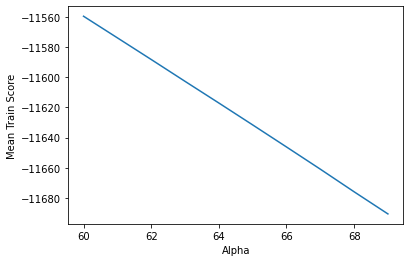

In [64]:
plot_lasso_x = [param['alpha'] for param in grid_lasso.cv_results_['params']]
plot_lasso_y = grid_lasso.cv_results_['mean_train_score']

plt.plot(plot_lasso_x, plot_lasso_y);

plt.xlabel('Alpha')
plt.ylabel('Mean Train Score')

plt.show()

The train score performance is decreasing along with the increased of alpha, now let's see how the test score performance as the alpha is increased.

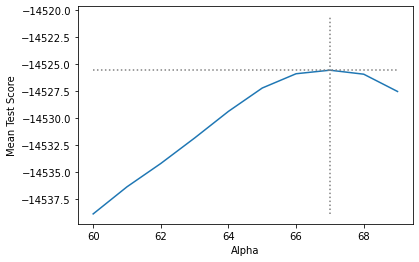

In [65]:
plot_lasso_x = [param['alpha'] for param in grid_lasso.cv_results_['params']]
plot_lasso_y = grid_lasso.cv_results_['mean_test_score']

plt.plot(plot_lasso_x, plot_lasso_y);

plt.vlines(x=params_lasso['alpha'], ymin=min(plot_lasso_y), ymax=max(plot_lasso_y) + 5, colors='gray', ls=':', lw=1.5)
plt.hlines(y=max(plot_lasso_y), xmin=min(plot_lasso_x), xmax=max(plot_lasso_x), colors='gray', ls=':', lw=1.5)

plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')

plt.show()

The data shows performance are increased as the model regularized more with the increasing alpha, but starting from 67, we can see that the performance are decreasing, the cross validation method has accurately select the best param of alpha with value 67, the regularization is intentionally stopped at alpha equal to 70, because beyond that we need a higher maximum number of iterations and it will decrease the training time significantly.

## 2.3. Model Evaluation

To aid in model evaluation, we would need to setup model prediction on the test data, and calculate the residual as follows.

In [66]:
y_pred_lasso = model_lasso.predict(X_test_lasso)

df_results = pd.DataFrame({'Actual': y_test_lasso['SalePrice'], 'Predicted': y_pred_lasso})
df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])

### 2.3.1. Linearity

The first assumption of lienar regression is that the relationship between actual versus predicted value should be linear, let's see how it looks like on the following scatter plot diagram.

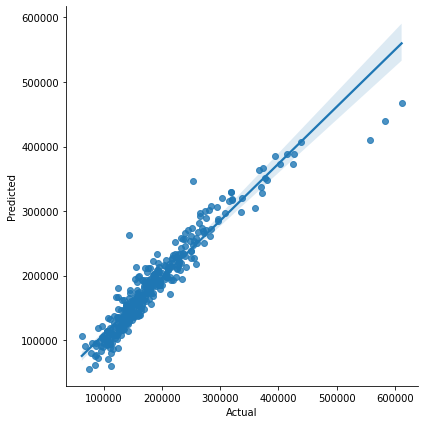

In [67]:
sns.lmplot(x='Actual', y='Predicted', data=df_results, height=6);

The relationship between actual and predicted value looks linear, and therefore this assumption is satisfied.

### 2.3.2. Normality of the Error Terms

The distribution of the error terms should be normal, let's take a look at the following histogram of error terms.

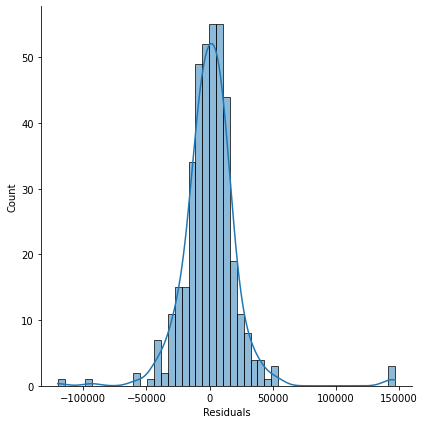

In [68]:
sns.displot(df_results['Residuals'], kde=True, height=6);

The distribution of the error terms appears to be normal, therefore this assumption is satisfied.

### 2.3.3. Homescedasticity

There should be little to no variance in the error terms, this indicates that the variance of the error terms are constant, let's see how it looks like on the following scatter plot of residuals.

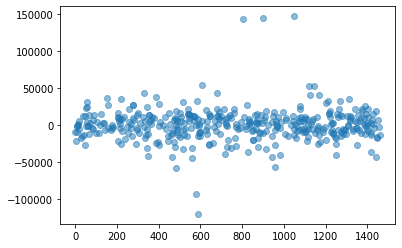

In [69]:
plt.scatter(x=df_results.index, y=df_results.Residuals, alpha=0.5);

As we can see, the variance of the error terms are constant, therefore this assumption is satisfied.

## 2.4. Best Possible Model

We can conclude that the best possible model is Lasso with the following hyperparameters.

In [70]:
best_model, best_scaler, best_params, best_X_train, _, best_X_test, _, _ = build_model_with_lasso(scoring='neg_mean_absolute_error', alpha=np.arange(60, 70, 1));

Best Params: {'alpha': 67, 'max_iter': 7500}

R-square of train data:  0.9446967650805644
R-square of tests data:  0.9100114560180644

Model Coeficients: 254
Model Coeficients != 0: 117


## 2.5. Model Interpretation

### 2.5.1. Model Coeficients

#### Data Preparations

Let's build a dataframe that we will use to combine feature name and its coeficients, it will be easier this way rather than zipping it, because we would need to filter down only to the significant ones, and pandas can help us do that easily.

In [71]:
df_coef = pd.DataFrame(df.columns.drop('SalePrice'), columns=['feature'])

Now let's add the coeficients.

In [72]:
df_coef['coef'] = best_model.coef_

Now let's filter only to those with significance, that is with coeficients not equal to 0.

In [73]:
df_coef = df_coef[df_coef['coef'] != 0]

#### Top 5 Positive Contributor

Finnally let's see the top 5 positive contributor.

In [74]:
df_coef.sort_values(by='coef', ascending=False).head(5)

,feature,coef
12,GrLivArea,170031.229750
0,LotArea,104949.746249
251,SalePricePerLotArea,92617.527596
7,TotalBsmtSF,35009.369731
51,Street_Pave,31352.553670


#### Top 5 Negative Contributor

And let's see the top 5 negative contributor.

In [75]:
df_coef.sort_values(by='coef', ascending=True).head(5)

,feature,coef
106,BldgType_Twnhs,-35601.189036
117,OverallQual_4,-30890.957121
123,OverallCond_3,-26402.386756
18,KitchenAbvGr,-25767.150186
118,OverallQual_5,-22900.243229


#### Conclusion

Despite the values reflects weights of each features, we couldn't interpret easily from those values due to the scale of the feature values, e.g. the scale of LotArea in comparison with the scale of YearBuilt aren't comparable, despite the values has been scaled with MinMaxScaler, but the underlying value are so different, while YearBuilt values only in thousands, LotArea values can be in tens or even hundreds of thousands, therefore we need a better way of interpreting our features.

### 2.5.2. Shapley Additive Explanations

#### SHAP Values

The following method will be used to plot shap values, and explain the most important predictor, we will not be using the plain weight value because the scale between values are different as it has been explained previously, e.g. YearBuilt values are in the range of thousands, while LotArea values are in the range of tens or thousands of hundreds, therefore even if we have scale the values using MinMaxScaler, but different scales between variables are unaccounted, therefore we need another way of measuring feature importance, e.g. using SHAP values.

In [76]:
def beeswarm(model, X_train, X_test):
    explainer = shap.Explainer(model.predict, X_test)
    shap_values = explainer(X_train)
    
    shap.plots.beeswarm(shap_values, max_display=10)

#### Beeswarm Plot

To have an interpretation of the overall model features, we can use beeswarm plot as follows, let's limit only to top 10 contributing features to have a simple visual representation, the features can be negative or positive contributing features.

Permutation explainer: 925it [00:50, 15.18it/s]                                                      


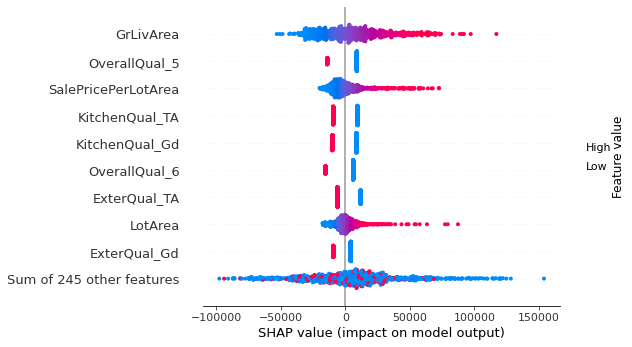

In [77]:
beeswarm(best_model, best_X_train, best_X_test)

#### Conclusion

Apparently, there are only a shortlist of features that contributes the most to our model:
1. GrLivArea
2. OverallQual
3. SalePricePerLotArea
4. KitchenQual
5. ExterQual
6. LotArea

There are several surprises from these findings:
1. GrLivArea contributes the most towards the model output, this implies living room is the outmost important.
2. SalePricePerLotArea, in layman terms, price per square feet, a derived metric that we created contributes significantly to the output.
3. LotArea that seems to be significant, is less important than qualities, e.g. overall quality, kitchen quality or external quality.

# 3. Subjective Model Experiments

This section is part of subjective model experiements, it does not contribute to the overall model performance, but rather an attempt to run experiments on the model with various conditions and treatments, that may otherwise affect the model negatively if they were to be integrated to the model, but still prove to be precious to learn from.

## 3.1. Double Alpha Value

In this section, we will try to run an experiment of doubling the best alpha value on each of the regularized model. We will double the value of best alpha both on the regularized Lasso and Ridge model.

### 3.1.1. Double Alpha Value with Ridge

#### Ridge with Best Alpha

Let's revisit our ridge model with the best alpha.

In [78]:
model_ridge_best_alpha, _, X_train_ridge_best_alpha, _, X_test_ridge_best_alpha, _ = build_model_with_ridge(alpha=params_ridge['alpha'] * 1, cv=False);

R-square of train data: 0.9475163965229382
R-square of tests data: 0.9081402689819881


With the best alpha value, the model can explain 94% of the train data, and 90% of the test data.

#### Ridge with Best Alpha Most Important Predictors

Permutation explainer: 925it [00:48, 15.36it/s]                                                      


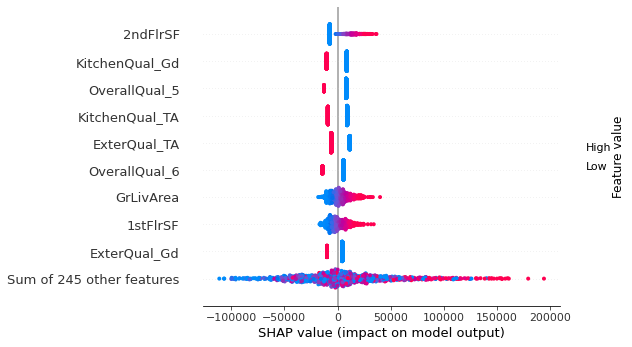

In [79]:
beeswarm(model_ridge_best_alpha, X_train_ridge_best_alpha, X_test_ridge_best_alpha)

#### Ridge with Double Value of Best Alpha

Now let's double the value of our best alpha and see the result.

In [80]:
model_ridge_best_alpha_double, _, X_train_ridge_best_alpha_double, _, X_test_ridge_best_alpha_double, _ = build_model_with_ridge(alpha=params_ridge['alpha'] * 2, cv=False);

R-square of train data: 0.941798558198405
R-square of tests data: 0.9071262869453414


R-square of the train and test data are reduced slightly, with less than 1% difference, it shows that the model is becoming more generic with the score on the train data reduced, but no longer able to increase the test score, and reduced the test score instead.

#### Ridge with Double Value of Best Alpha Most Important Predictors

Permutation explainer: 925it [00:47, 15.28it/s]                                                      


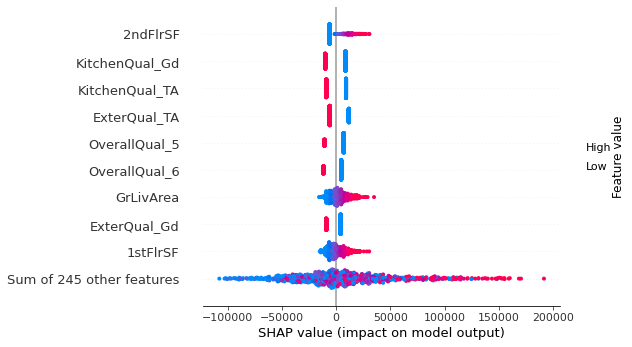

In [81]:
beeswarm(model_ridge_best_alpha_double, X_train_ridge_best_alpha_double, X_test_ridge_best_alpha_double)

### 3.1.2. Double Alpha Value with Lasso

#### Lasso with Best Alpha

Let's revisit our lasso model with the best alpha.

In [82]:
model_lasso_best_alpha, _, X_train_lasso_best_alpha, _, X_test_lasso_best_alpha, _ = build_model_with_lasso(alpha=params_lasso['alpha'] * 1, cv=False)

R-square of train data:  0.9446967650805644
R-square of tests data:  0.9100114560180644

Model Coeficients: 254
Model Coeficients != 0: 117


With the best alpha value, the model can explain 94% of the train data, 91% of the test data, and 117 features are deemed significant.

#### Lasso with Best Alpha Most Important Predictors

Permutation explainer: 925it [00:47, 15.37it/s]                                                      


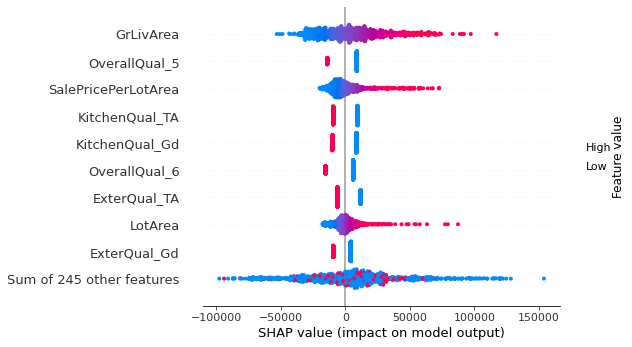

In [83]:
beeswarm(model_lasso_best_alpha, X_train_lasso_best_alpha, X_test_lasso_best_alpha)

#### Lasso with Double Value of Best Alpha

Now let's double the value of our best alpha and see the result.

In [84]:
model_lasso_best_alpha_double, _, X_train_lasso_best_alpha_double, _, X_test_lasso_best_alpha_double, _ = build_model_with_lasso(alpha=params_lasso['alpha'] * 2, cv=False)

R-square of train data:  0.9344386292068105
R-square of tests data:  0.9050395296764807

Model Coeficients: 254
Model Coeficients != 0: 92


R-square of the train and test data are reduced slightly, with 1% difference, a few reductions of feature being selected from 117 down to 92. It shows that the model is becoming more generic with the score on the train data reduced, but no longer able to increase the test score, and reduced the test score instead.

#### Lasso with Double Value of Best Alpha Most Important Predictors

Permutation explainer: 925it [00:45, 16.04it/s]                                                      


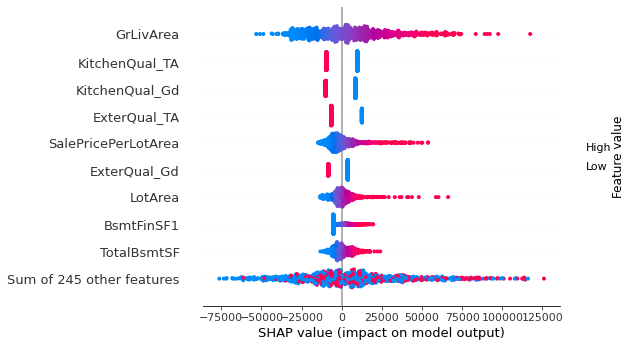

In [85]:
beeswarm(model_lasso_best_alpha_double, X_train_lasso_best_alpha_double, X_test_lasso_best_alpha_double)

## 3.2. Five Most Important Variables Unavailable

### 3.2.1. Lasso Model with Exclusion

Five most important variables in the lasso model are as follows:
1. GrLivArea
2. OverallQual
3. SalePricePerLotArea
4. KitchenQual
5. ExterQual

Removing GrLivArea and SalePricePerLotArea are simple as they are numerical columns, but the other three are categorical columns that has been one-hot encoded, therefore we need to make sure we are excluding all of the one-hot encoded columns of those variables.

In [86]:
excluded = [
    'GrLivArea', 'SalePricePerLotArea',
    'OverallQual_1', 'OverallQual_2', 'OverallQual_3', 'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7', 'OverallQual_8', 'OverallQual_9', 'OverallQual_10',
    'KitchenQual_Ex', 'KitchenQual_Gd', 'KitchenQual_TA', 'KitchenQual_Fa', 'KitchenQual_Po',
    'ExterQual_Ex', 'ExterQual_Gd', 'ExterQual_TA', 'ExterQual_Fa', 'ExterQual_Po',
]

Finally let's re-build out model with the excluded columns.

In [87]:
model_lasso_excluded, scaler_lasso_excluded, params_lasso_excluded, X_train_lasso_excluded, _, X_test_lasso_excluded, _, _ = build_model_with_lasso(scoring='neg_mean_absolute_error', alpha=np.arange(60, 70, 1), exclude=excluded);

Best Params: {'alpha': 67, 'max_iter': 7500}

R-square of train data:  0.9273750799031806
R-square of tests data:  0.8841631490797605

Model Coeficients: 238
Model Coeficients != 0: 122


### 3.2.2. Lasso Model with Exclusion Most Important Predictors

Now let's find out what are the most important features of the new model.

Permutation explainer: 925it [00:38, 17.92it/s]                                                      


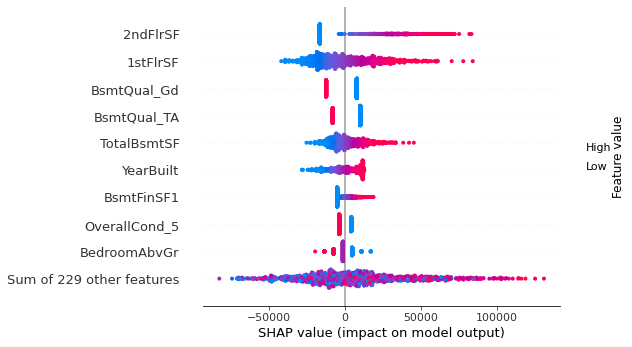

In [88]:
beeswarm(model_lasso_excluded, X_train_lasso_excluded, X_test_lasso_excluded)

To summarize, the top 5 most important predictors are:
1. 2ndFlrSF
2. 1stFlrSF
3. BsmtQual
4. TotalBsmtSF
5. YearBuilt

It looks like square feet of each floor from the second floor, down to basement, along the the basement quality and the year being built are the top 5 most important features, and they totally makes sense.

## 3.3. Non-Linear Transformation

Let's revisit out numerical variables relationship with our target variable by drawing scatter plots.

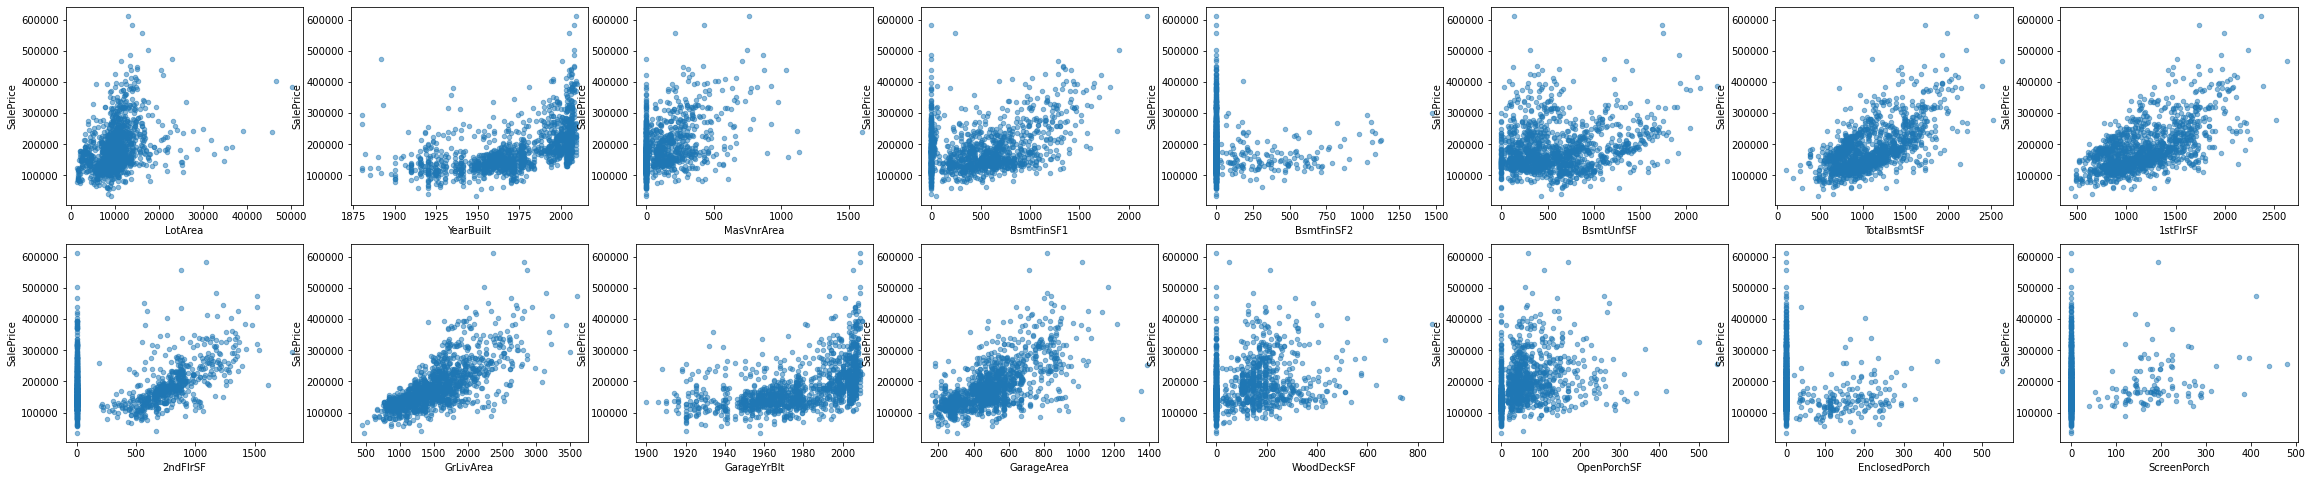

In [89]:
scatters(df, df_dtypes_int_reshape, 'SalePrice', (40, 8))

From the above charts, we can see there are several variables that appears to have non-linear relationship with the target variable, on the next following sections we will evaluate if we can do transformation on these variables.

### 3.3.1. Transform Non-Linear Variables

#### Variable Transformation

The following variables appears to have a slight curve that doesn't fit linearly with the target variable.

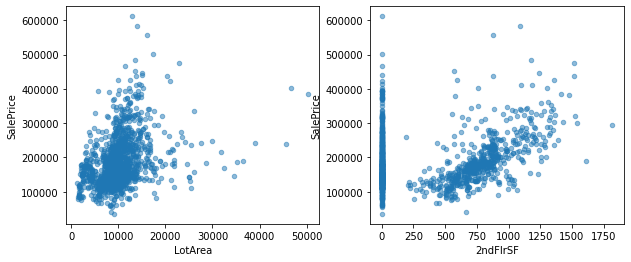

In [90]:
scatters(df, np.array(['LotArea', '2ndFlrSF']).reshape(1, 2), 'SalePrice', (10, 4))

Both variables looks like to have quadratic pattern, let's transform them into their quadratic variables.

In [91]:
df['LotArea_Square'] = np.square(df['LotArea'])
df['2ndFlrSF_Square'] = np.square(df['2ndFlrSF'])

Now let's see the impact of our transformation, do the non-linear pattern still persists.

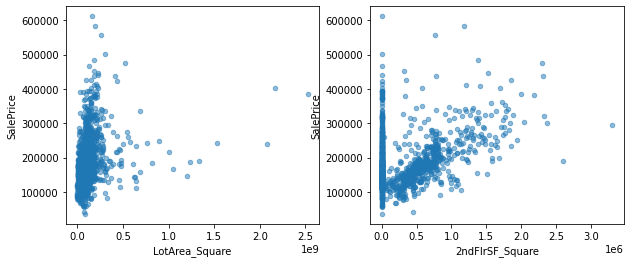

In [92]:
scatters(df, np.array(['LotArea_Square', '2ndFlrSF_Square']).reshape(1, 2), 'SalePrice', (10, 4))

Perfect, both variables no longer showing non-linearity, now let's move on to the next step of re-building the model with the transformed variables.

#### Rebuild Model with Transformed Variables

Our transformation are done in hopes of increasing the performance of our model, let's revisit our model performance.

In [93]:
build_model_with_lasso(alpha=params_lasso['alpha'], cv=False);

R-square of train data:  0.9446967650805644
R-square of tests data:  0.9100114560180644

Model Coeficients: 254
Model Coeficients != 0: 117


Because we have added new variables, let's resplit our dataset into train and test set.

In [94]:
df_train, df_test = train_test_split(df, train_size=0.7, test_size=0.3, random_state=0)

Finally let's run our cross validation on the model with lasso regularization.

In [95]:
build_model_with_lasso(scoring='neg_mean_absolute_error', alpha=np.arange(70, 80, 1));

Best Params: {'alpha': 74, 'max_iter': 7500}

R-square of train data:  0.9440049736449915
R-square of tests data:  0.9097420069409502

Model Coeficients: 256
Model Coeficients != 0: 119


Turns out our original model without the transformation performed better than the model with the transformation, this indicates that the transformation affect negatively to the model performance.

### 3.3.2. Non-Linear Variables Lookalike

We have another variables that appears to have non-linear relationship with the target variables, but they can't be transformed.

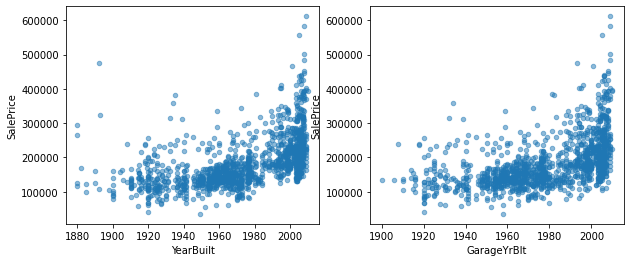

In [96]:
scatters(df, np.array(['YearBuilt', 'GarageYrBlt']).reshape(1, 2), 'SalePrice', (10, 4))

They look like quadratic function, so let's see if transforming these variables have any impact.

In [97]:
df['YearBuilt_Square'] = np.square(df['YearBuilt'])
df['GarageYrBlt_Square'] = np.square(df['GarageYrBlt'])

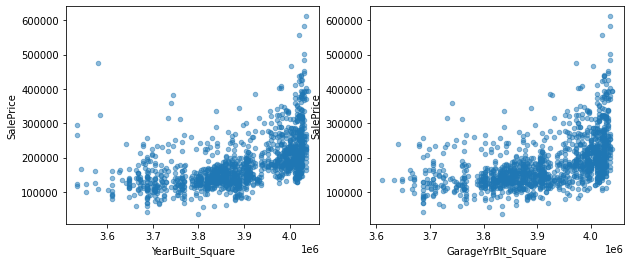

In [98]:
scatters(df, np.array(['YearBuilt_Square', 'GarageYrBlt_Square']).reshape(1, 2), 'SalePrice', (10, 4))

There seems to be no change in the variables despite their visual appearance are quadratic, this indicates that these variables are not quadratic, that's why transforming them into the quadratic form doesn't have any impact, unlike what we did with the previous two variables.